In [1]:
import pandas as pd
import numpy as np

In [2]:
acc = pd.read_csv('processed_data/acc.csv')
eda = pd.read_csv('processed_data/eda.csv')
hr = pd.read_csv('processed_data/hr.csv')
temp = pd.read_csv('processed_data/temp.csv')
grades = pd.read_csv('processed_data/grades.csv')

In [3]:
def append_df_name(df, df_name):
    df.columns = [f"{col}_{df_name}" for col in df.columns]

In [4]:
append_df_name(acc, 'acc')
append_df_name(eda, 'eda')
append_df_name(hr, 'hr')
append_df_name(temp, 'temp')

In [5]:
acc.iloc[:, 1:4]

,1-One Third (During)_acc,2-Two Third (During)_acc,3-Three Third (During)_acc
0,9.924574,9.931743,9.968197
1,9.884318,10.028550,9.954050
2,9.923845,9.917446,9.924282
3,9.820483,9.764696,9.799434
4,9.773319,9.799379,9.462331
5,9.493996,9.461236,9.461184
6,10.021742,9.995035,10.070020
7,9.750248,9.987637,10.052952
8,10.056064,9.961676,10.014708
9,9.924485,9.936486,9.989689


In [6]:
merged_df = pd.concat([acc.iloc[:, 1:4].mean(axis=1), eda.iloc[:, 1:4].mean(axis=1), hr.iloc[:, 1:4].mean(axis=1), temp.iloc[:, 1:4].mean(axis=1), grades], axis=1)
merged_df.columns=['acc', 'eda', 'hr', 'temp', 'Name','Percentage_Score']
merged_df.set_index('Name', inplace=True)
merged_df.head()

,acc,eda,hr,temp,Percentage_Score
Name,,,,,
S1_Final,9.941504,0.187585,93.420553,29.908413,0.91
S1_Midterm 1,9.955639,0.522820,109.612309,25.129296,0.78
S1_Midterm 2,9.921858,0.198320,100.620402,31.366444,0.82
S2_Final,9.794871,0.141600,104.857865,34.950529,0.90
S2_Midterm 1,9.678343,0.176034,126.542609,25.173511,0.82


In [7]:
m= merged_df['temp'].mean()
s= merged_df['temp'].std()
print(f'mean: {m}, std: {s}')

mean: 29.48904200617284, std: 3.577973304894227


In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# # Assuming X and y are already defined
# X_train = merged_df.drop(columns='Percentage_Score')
# y_train = merged_df['Percentage_Score'] * 100

X = merged_df.drop(columns='Percentage_Score')
y = merged_df['Percentage_Score'] * 100

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train_scaled, y)

# Make predictions using the testing data
y_pred = model.predict(X_train_scaled)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Optionally, print the coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error: 177.30429803551309
R^2 Score: 0.21278269302519393
Coefficients: [ 2.90363925 -2.56645111  8.76470946  7.14872699]
Intercept: 75.25000000000001


In [9]:
std_X = pd.DataFrame(X_train_scaled)
pred_y = pd.DataFrame(y_pred)
actual_y = pd.DataFrame(y).reset_index(drop=True)

In [10]:
data_extended = pd.concat([std_X, pred_y], axis=1)
data_extended.columns = ['acc', 'eda', 'hr', 'temp', 'Predicted']
data_extended.head()

,acc,eda,hr,temp,Predicted
0,0.355786,-0.921101,-0.282280,0.119213,77.025150
1,0.456529,0.699861,0.817617,-1.239326,73.086009
2,0.215758,-0.869196,0.206802,0.533681,83.734930
3,-0.689312,-1.143453,0.494650,1.552514,91.617066
4,-1.519837,-0.976954,1.967684,-1.226758,81.820670


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Combine with original dataset for visualization
data_extended['Predicted'] = (data_extended['Predicted'] - data_extended['Predicted'].mean()) / data_extended['Predicted'].std()

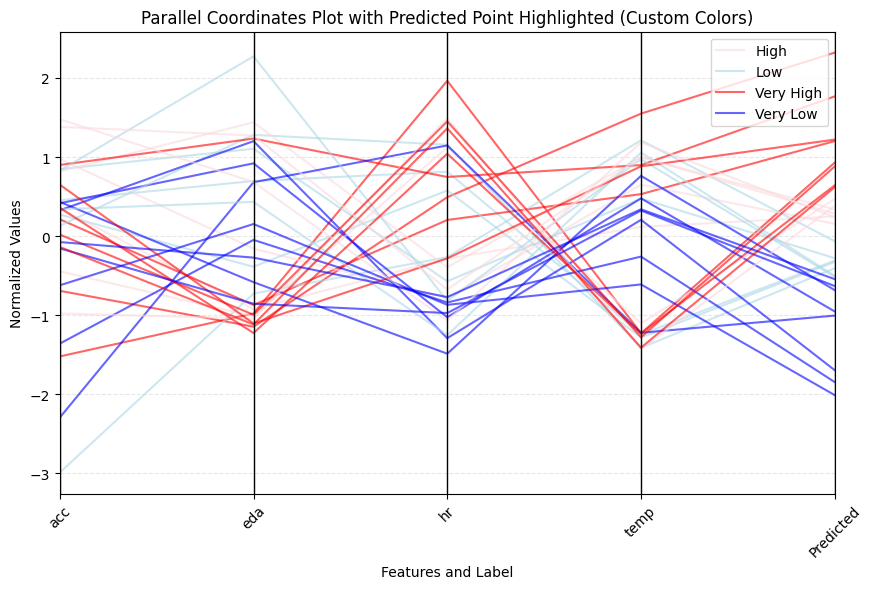

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from pandas.api.types import CategoricalDtype
from matplotlib.colors import ListedColormap

# Define label categories in a meaningful order
label_names = ["Very Low", "Low", "High", "Very High"]
cat_dtype = CategoricalDtype(categories=label_names, ordered=True)
data_extended['Label Category'] = pd.qcut(data_extended['Predicted'], q=4, labels=label_names)
data_extended['Label Category'] = data_extended['Label Category'].astype(cat_dtype)  # Ensure order

# Manually define distinct colors
custom_colors = ["#FADADD","#ADD8E6", "#FF0000", "#0000FF"]  # Purple, Blue, Green, Yellow
custom_cmap = ListedColormap(custom_colors)

# Plot Parallel Coordinates with Custom Colors
plt.figure(figsize=(10, 6))
parallel_coordinates(data_extended, class_column='Label Category', colormap=custom_cmap, alpha=0.6)

plt.title("Parallel Coordinates Plot with Predicted Point Highlighted (Custom Colors)")
plt.xlabel("Features and Label")
plt.ylabel("Normalized Values")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

In [13]:
data_extended.to_csv("final_plot.csv", index=False)

### Plot for feature comparison

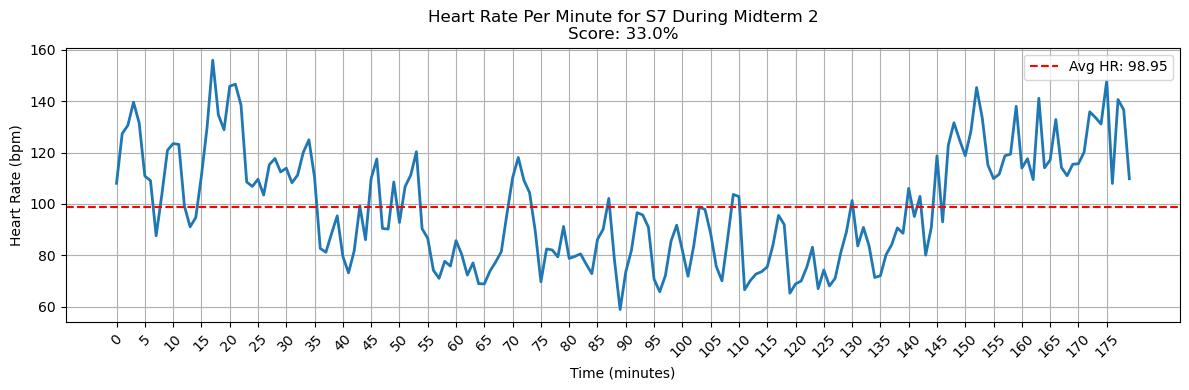

,Minute,HR
0,0,108.026500
1,1,127.390333
2,2,130.598167
3,3,139.643333
4,4,131.495167
...,...,...
175,175,147.988000
176,176,107.955500
177,177,140.658667
178,178,136.662000


In [37]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def get_data(sid, exam):
    file_path = f'data/{sid}/{exam}/HR.csv'
    
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"The file at {file_path} does not exist.")
        return None
    
    # Load HR data
    hr = pd.read_csv(file_path, names=["HR"], header=None)
    session_start_unix, sample_rate = hr.iloc[0, 0], hr.iloc[1, 0]
    
    # Process HR timestamps
    hr = hr.iloc[2:].reset_index(drop=True)
    hr['Timestamp'] = session_start_unix + (hr.index / sample_rate)
    hr['HR'] = hr['HR'].astype(float)

    # Create 1-minute bins
    time_bins = np.arange(hr['Timestamp'].min(), hr['Timestamp'].max(), 60)
    hr['Time_Bin'] = pd.cut(hr['Timestamp'], bins=time_bins, right=False, labels=range(len(time_bins) - 1))
    
    # Compute average HR per minute
    avg_hr_per_min = hr.groupby('Time_Bin')['HR'].mean().dropna()
    
    # Load exam scores
    scores = pd.read_csv('processed_data/grades.csv')
    score_row = scores[scores['Name'] == f'{sid}_{exam}']
    score = score_row['Percentage_Score'].values[0] if not score_row.empty else None

    plt.figure(figsize=(12, 4))
    plt.plot(avg_hr_per_min.index.astype(int), avg_hr_per_min.values, linestyle='-', linewidth=2)
    plt.axhline(y=hr['HR'].mean(), color='r', linestyle='--', label=f'Avg HR: {hr["HR"].mean():.2f}')
    plt.title(f'Heart Rate Per Minute for {sid} During {exam}\nScore: {score*100 if score is not None else "N/A"}%')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Heart Rate (bpm)')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(min(avg_hr_per_min.index.astype(int)), max(avg_hr_per_min.index.astype(int)) + 1, 5), rotation=45)
    plt.tight_layout()
    plt.show()

    # Export the data to CSV
    avg_hr_per_min_df = avg_hr_per_min.reset_index()
    avg_hr_per_min_df.columns = ['Minute', 'HR']
    avg_hr_per_min_df.to_csv(f'output_{sid}_{exam}_HR.csv', index=False)

    return avg_hr_per_min_df

# Example usage, assuming the file path and directory structure are correct
get_data('S7', 'Midterm 2')
